# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

orig_size = 1500

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=orig_size)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=orig_size)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 570


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#from urllib.parse import quote

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"{city}&appid={weather_api_key}&units=metric"

     # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

       # Append the City information into city_data list
        
        #  # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_utm = city_weather['dt']

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_utm
                          })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kruisfontein
Processing Record 2 of Set 1 | prince rupert
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | kargasok
Processing Record 7 of Set 1 | lingig
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | mount isa
Processing Record 10 of Set 1 | mejit
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | prince george
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | devarkonda
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | hailar
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | salgueiro
Processing Record 20 of Set 1 | pelabuhanratu
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | zhijiang
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kruisfontein,-34.0033,24.7314,26.05,56,44,5.60,ZA,1705144880
1,prince rupert,54.3161,-130.3201,-9.95,73,40,2.57,CA,1705144881
2,invercargill,-46.4000,168.3500,14.45,94,99,4.92,NZ,1705144883
3,blackmans bay,-43.0167,147.3167,13.74,56,1,1.34,AU,1705144885
4,puerto ayora,-0.7393,-90.3518,24.75,95,3,2.68,EC,1705144886


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kruisfontein,-34.0033,24.7314,26.05,56,44,5.60,ZA,1705144880
1,prince rupert,54.3161,-130.3201,-9.95,73,40,2.57,CA,1705144881
2,invercargill,-46.4000,168.3500,14.45,94,99,4.92,NZ,1705144883
3,blackmans bay,-43.0167,147.3167,13.74,56,1,1.34,AU,1705144885
4,puerto ayora,-0.7393,-90.3518,24.75,95,3,2.68,EC,1705144886


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
# set readable date 
utm_time = city_data_df['Date'].max()
date_readable = time.strftime("%Y-%m-%d", time.localtime(utm_time))

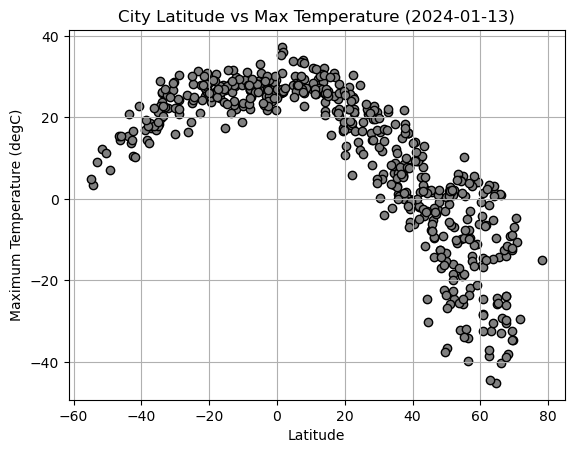

In [9]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots()
pts_lat_v_temp = ax.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', c='grey', edgecolors='black')

# Incorporate the other graph properties

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Maximum Temperature (degC)")
ax.set_title(f"City Latitude vs Max Temperature ({date_readable})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

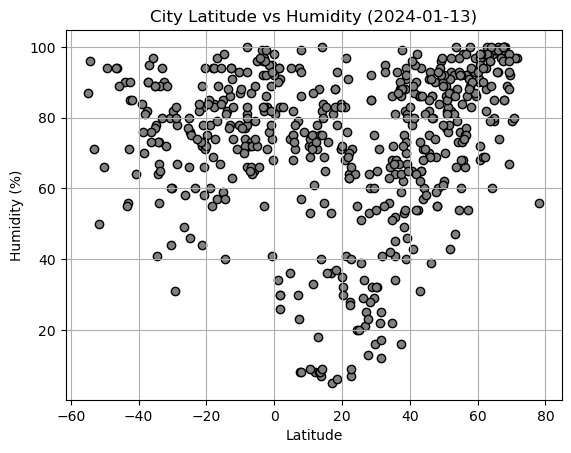

<Figure size 640x480 with 0 Axes>

In [10]:
fig, ax = plt.subplots()


# Build the scatter plots for latitude vs. humidity
pts_lat_v_humidity = ax.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', c='grey', edgecolors='black')

# Incorporate the other graph properties
ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title(f"City Latitude vs Humidity ({date_readable})")

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

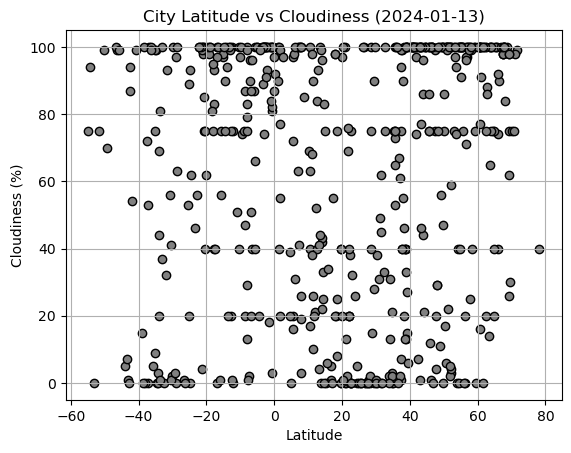

<Figure size 640x480 with 0 Axes>

In [11]:
fig, ax = plt.subplots()

# Build the scatter plots for latitude vs. cloudiness
pts_lat_v_clouds = ax.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', c='grey', edgecolors='black')

# Incorporate the other graph properties
ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title(f"City Latitude vs Cloudiness ({date_readable})")

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()



#### Latitude vs. Wind Speed Plot

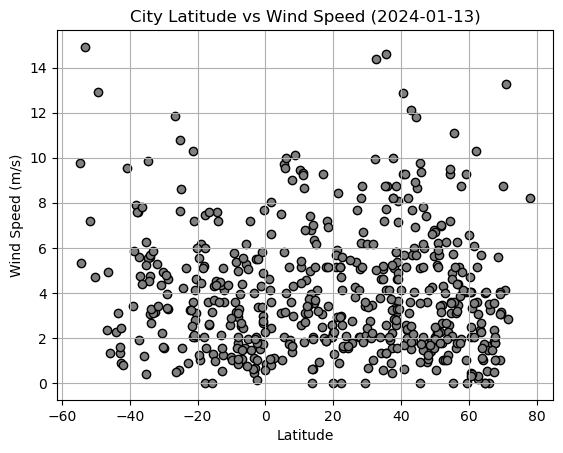

<Figure size 640x480 with 0 Axes>

In [12]:
fig, ax = plt.subplots()

# Build the scatter plots for latitude vs. wind speed
pts_lat_v_wind = ax.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', c='grey', edgecolors='black')

# Incorporate the other graph properties
ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title(f"City Latitude vs Wind Speed ({date_readable})")

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_lingress(x, y, input_ax):
    """Creates a linear regression model from scikit-learn and plots it on a given matplotlib axis and returns the correlation factor.

    Args:
        x (array): x-dimension array
        y (array): y-dimension array
        input_ax (matplotlib axis): Matplotlib axis to plot the linear regression fit

    Returns:
        float: correlation factor r-value
    """
    model = linregress(x, y)
    slope = model.slope
    intercept = model.intercept
    r_value = model.rvalue

    x_lingress = np.arange(x.min(), x.max(), 5)
    y_lingress = x_lingress * slope + intercept
    input_ax.plot(x_lingress, y_lingress, c='red', 
                  label=f"y = {round(slope, 1)}*x + {round(intercept, 1)}\n r-value: {round(r_value, 3)}")
    input_ax.legend(fontsize=12)
    
    return r_value



In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,prince rupert,54.3161,-130.3201,-9.95,73,40,2.57,CA,1705144881
5,kargasok,59.0556,80.8572,-11.13,93,100,4.02,RU,1705144886
6,lingig,8.0389,126.4125,26.03,86,100,2.99,PH,1705144887
7,kodiak,57.7900,-152.4072,3.73,100,100,8.75,US,1705144888
9,mejit,10.2753,170.8646,26.89,72,69,9.44,MH,1705144889


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kruisfontein,-34.0033,24.7314,26.05,56,44,5.60,ZA,1705144880
2,invercargill,-46.4000,168.3500,14.45,94,99,4.92,NZ,1705144883
3,blackmans bay,-43.0167,147.3167,13.74,56,1,1.34,AU,1705144885
4,puerto ayora,-0.7393,-90.3518,24.75,95,3,2.68,EC,1705144886
8,mount isa,-20.7333,139.5000,30.87,58,75,2.06,AU,1705144889


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.865


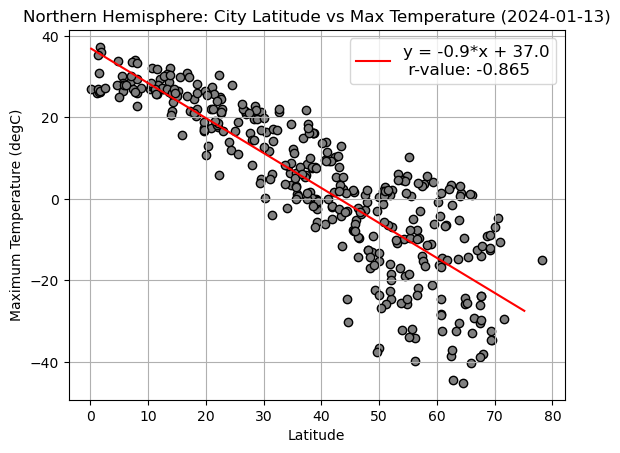

In [16]:
fig, ax = plt.subplots()

ax.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], marker='o', c='grey', edgecolors='black')

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Maximum Temperature (degC)")
ax.set_title(f"Northern Hemisphere: City Latitude vs Max Temperature ({date_readable})")

r_value = plot_lingress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], ax)

print(f"The r-value is: {round(r_value, 3)}")
plt.show()

The r-value is: 0.702


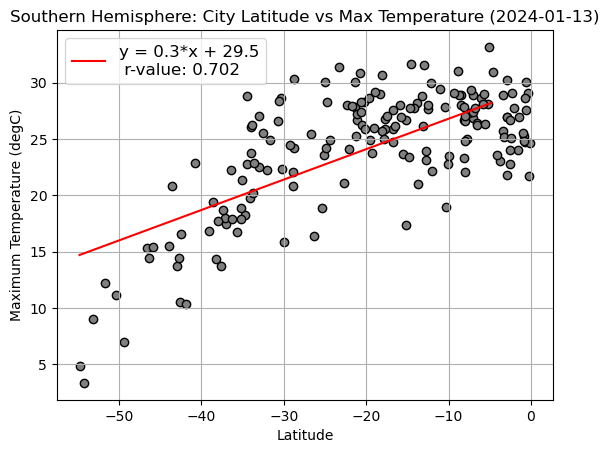

In [17]:
fig, ax = plt.subplots()

ax.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker='o', c='grey', edgecolors='black')

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Maximum Temperature (degC)")
ax.set_title(f"Southern Hemisphere: City Latitude vs Max Temperature ({date_readable})")

r_value = plot_lingress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], ax)

print(f"The r-value is: {round(r_value, 3)}")
plt.show()

**Discussion about the linear relationship:** 

By dividing the temperature data into northern and southern hemisphere segments, there is a clear medium-high correlation between latitude and temperatue. The northern hemisphere appears to have a better fit compared to the southern hemisphere. A reasonable correlation between latitude and temperature makes intuitive sense. In general, a the closer to the equator, the the hotter it becomes.

In the southern hemisphere, there is a positive correlation i.e. the further south (decreasing latitude), the colder the maximum temperature becomes colder.

In the northern hemisphere, there is a negative correlation i.e. the further north (increasing latitude), the colder the maximum temperature becomes colder.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.452


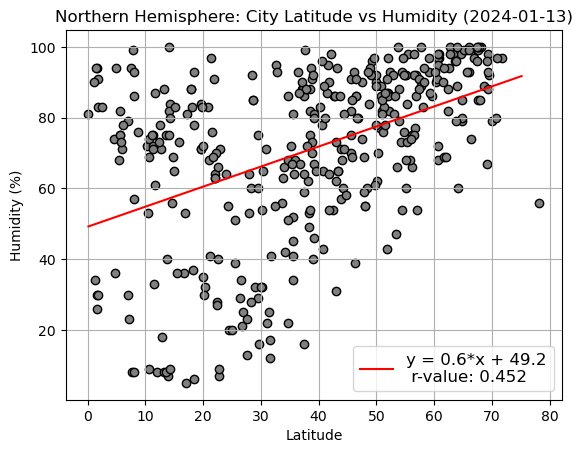

In [18]:
# Northern Hemisphere

fig, ax = plt.subplots()

ax.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], marker='o', c='grey', edgecolors='black')

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title(f"Northern Hemisphere: City Latitude vs Humidity ({date_readable})")

r_value = plot_lingress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], ax)

print(f"The r-value is: {round(r_value, 3)}")
plt.show()

The r-value is: 0.12


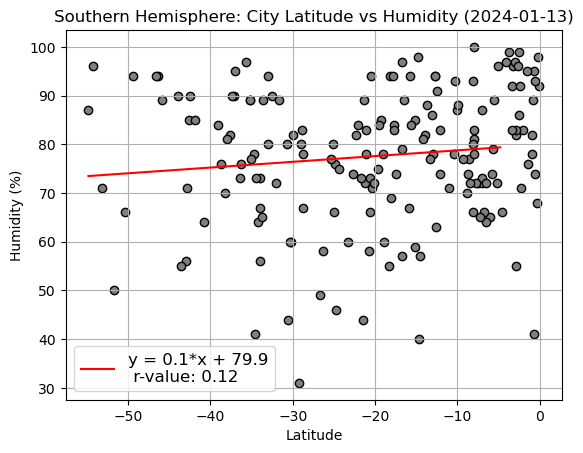

In [19]:
# Southern Hemisphere
fig, ax = plt.subplots()

ax.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], marker='o', c='grey', edgecolors='black')

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title(f"Southern Hemisphere: City Latitude vs Humidity ({date_readable})")

r_value = plot_lingress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], ax)

print(f"The r-value is: {round(r_value, 3)}")
plt.show()

**Discussion about the linear relationship:** 

It is interesting to see that there is a weak positive correlation in the Northern Hemisphere between latitude and humidity. There tends to be a large scatter in the data. In the southern hemisphere there is no correlation. 

I found this to be a little surprising. Intuitively I would have predicted higher humidity in the tropical regions. i.e. a positive correlation in the southern hemisphere and a negative correlation in the northern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.304


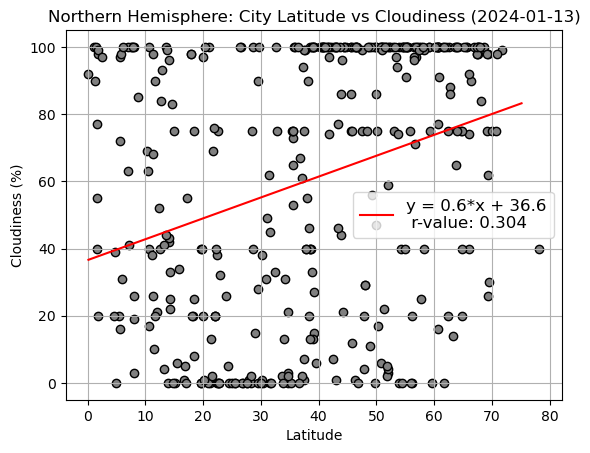

In [20]:
# Northern Hemisphere
fig, ax = plt.subplots()

ax.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], marker='o', c='grey', edgecolors='black')

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title(f"Northern Hemisphere: City Latitude vs Cloudiness ({date_readable})")

r_value = plot_lingress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], ax)

print(f"The r-value is: {round(r_value, 3)}")
plt.show()

The r-value is: 0.256


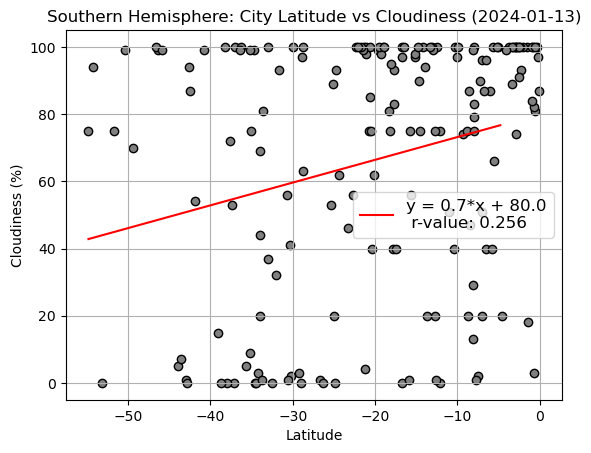

In [21]:
# Southern Hemisphere
fig, ax = plt.subplots()

ax.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker='o', c='grey', edgecolors='black')

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title(f"Southern Hemisphere: City Latitude vs Cloudiness ({date_readable})")

r_value = plot_lingress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], ax)

print(f"The r-value is: {round(r_value, 3)}")
plt.show()

**Discussion about the linear relationship:** 

Looking at the scatter plots for each hemisphere, it is apparent that much of the data clusters around zero or 100% cloudiness. The relative average latitudes for 0 and 100% cloudiness for each hemisphere appear to strongly influence the linear fit. The correlation between latitude and cloudiness is positive and very weak for both hemispheres. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.087


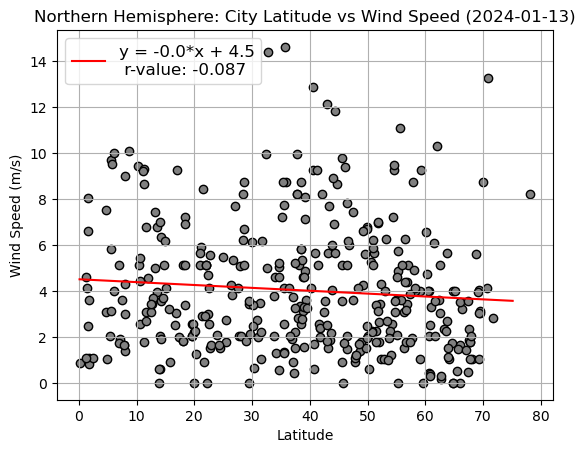

In [22]:
# Northern Hemisphere
fig, ax = plt.subplots()

ax.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], marker='o', c='grey', edgecolors='black')

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title(f"Northern Hemisphere: City Latitude vs Wind Speed ({date_readable})")

r_value = plot_lingress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], ax)

print(f"The r-value is: {round(r_value, 3)}")
plt.show()

The r-value is: -0.326


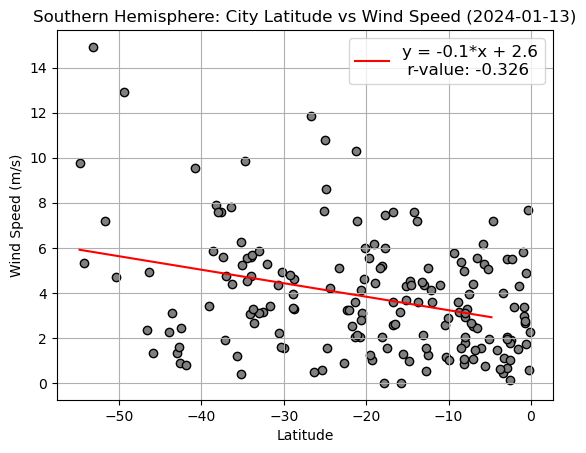

In [23]:
# Southern Hemisphere
fig, ax = plt.subplots()

ax.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], marker='o', c='grey', edgecolors='black')

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title(f"Southern Hemisphere: City Latitude vs Wind Speed ({date_readable})")

r_value = plot_lingress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], ax)

print(f"The r-value is: {round(r_value, 3)}")
plt.show()

**Discussion about the linear relationship:** 

Both hemispheres have little correlation between latitude and wind speed. This intuitively makes sense.